In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier, plot_tree



Dataset loading and organization

In [2]:
df = pd.read_csv('C:/Users/szaroog/OneDrive - Intel Corporation/Desktop/afterAdata.csv', header=0)
df = df.drop(df.columns[0], axis=1) # remove ID column
df = df.drop('nullnumbers', 1)
X = df.drop('smoking', 1)
y = df['smoking']
k_folds = KFold(n_splits=10)

le_gender = LabelEncoder()
le_age = LabelEncoder()
le_tartar = LabelEncoder()
le_BMI = LabelEncoder()
le_BloodPressure = LabelEncoder()

X['gender_n']= le_gender.fit_transform(X['gender'])
X['age_n']= le_gender.fit_transform(X['age'])
X['tartar_n']= le_gender.fit_transform(X['tartar'])
X['BMI_n']= le_gender.fit_transform(X['BMI'])
X['BloodPressure_n']= le_gender.fit_transform(X['BloodPressure'])


C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\2655816250.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('nullnumbers', 1)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\2655816250.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('smoking', 1)


In [3]:
X = X.drop(['gender','age','tartar','BMI','BloodPressure'],axis ='columns')

pd.value_counts(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

DT

In [ ]:
param_grid = {'max_depth': np.arange(5, 39, 1),
              'criterion': ['entropy', 'gini'],
              'min_samples_split': np.arange(2, 10, 2),
              'max_features': ['sqrt', 'log2', None]
             } 
comb = 1
for list_ in param_grid.values():
    comb *= len(list_)
print(comb)

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=420),
                           param_grid=param_grid,
                           refit=True,
                           cv=k_fold, verbose=3, scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_model = grid_search.best_estimator_
print(grid_search.best_params_, '\n')
print(best_model.get_params(), '\n')
pd.DataFrame(grid_search.cv_results_)

In [ ]:

preds = best_model.predict(X_test)
print("Test f1_score: ", round(f1_score(y_test, preds), 5))
preds1 = best_model.predict(X_train)
print("train f1_score: ", round(f1_score(y_train, preds1), 5))

In [ ]:
plt.figure(figsize=(40, 10))
plot_tree(best_model, filled=True, class_names=['FALSE', 'TRUE'], feature_names=X_train.columns, fontsize=7)
plt.show()

In [ ]:
path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth =grid_search.best_params_.get('max_depth'),
                                 criterion =grid_search.best_params_.get('criterion'),
                                 min_samples_split= grid_search.best_params_.get('min_samples_split'),
                                 max_features= grid_search.best_params_.get('max_features'),
                                 random_state=420, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
train_scores = [f1_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [f1_score(y_test, clf.predict(X_test))for clf in clfs]


In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
ax.set_xlim(left=0, right=0.0002)
plt.show()

In [ ]:
max=0
c=0
for i in range(len(test_scores)):
    if test_scores[i]>max:
        max= test_scores[i]
        c=clfs[i]
print(max)
print(c)

In [ ]:
model_best_tree = DecisionTreeClassifier(max_depth =grid_search.best_params_.get('max_depth'),
                                 criterion =grid_search.best_params_.get('criterion'),
                                  min_samples_split= grid_search.best_params_.get('min_samples_split'),
                                 max_features= grid_search.best_params_.get('max_features'),
                                         random_state=420, ccp_alpha=(0.00025089))

model_best_tree.fit(X_train, y_train)

In [ ]:

preds = model_best_tree.predict(X_test)
print("Test f1_score: ", round(f1_score(y_test, preds), 5))
preds1 = model_best_tree.predict(X_train)
print("train f1_score: ", round(f1_score(y_train, preds1), 5))

In [ ]:
plt.figure(figsize=(40, 10))
plot_tree(model_best_tree, filled=True, class_names=['FALSE', 'TRUE'],max_depth=2, feature_names=X_train.columns, fontsize=7)
plt.show()

In [ ]:
importances = model_best_tree.feature_importances_
sorted_importances = sorted(importances, reverse=True)

Neural Networks 

In [60]:


standard = StandardScaler()
X_train_S = X_train.copy()
X_train_S = standard.fit_transform(X_train_S)

 

Deafult model:

In [61]:

ann_model = MLPClassifier(random_state=42)

ann_train_result = pd.DataFrame()
ann_valid_result = pd.DataFrame()


for train_idx, val_idx in k_folds.split(X_train_S):
    x_trainSet = X_train_S[train_idx]
    y_trainSet = y_train.iloc[train_idx]
    x_valSet = X_train_S[val_idx]
    y_valSet = y_train.iloc[val_idx]

    ann_model.fit(x_trainSet, y_trainSet)

    f1_train = f1_score(y_trainSet, ann_model.predict(x_trainSet), average='macro')
    f1_val = f1_score(y_valSet, ann_model.predict(x_valSet), average='macro')

    ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
    ann_valid_result = ann_valid_result.append({'val Best f1': f1_val}, ignore_index=True)


c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\4205611733.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\4205611733.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_valid_result = ann_valid_result.append({'val Best f1': f1_val}, ignore_index=True)
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Train Best f1    0.772929
dtype: float64
test Best f1    0.732086
dtype: float64
test Best f1  0.7343254336107625


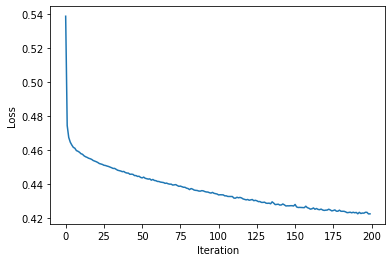

In [18]:
ann_train_best = ann_train_result.mean()
ann_valid_best = ann_valid_result.mean()
print(ann_train_best)
print(ann_valid_best)
print('test Best f1 ',f1_score(y_test, ann_model.predict(standard.fit_transform(X_test)), average='macro') )
plt.plot(ann_model.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

hiper parameter tuning

In [7]:
param_grid = {'hidden_layer_sizes': [(8,), (8,8),(8,8,8),(8,16),(8,32),(16,),(16,16),(16,16,16),(16,32),(32,),(32,32),(32,32,32) ],
              'max_iter': [500],
              'solver': ['adam']
              }

grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42, verbose=False, max_iter=500), param_grid=param_grid,
                           refit=True, cv=10, return_train_score=True,scoring='f1')
grid_search.fit(X_train_S, y_train)
Results = pd.DataFrame(grid_search.cv_results_)
print('The best parameters are:', grid_search.best_params_)
y_val = Results['mean_test_score']
y_trainAnn = Results['mean_train_score']
results_grid_search1 = pd.DataFrame(Results).sort_values('rank_test_score')[['params', 'mean_test_score']]
results_grid_search2 = pd.DataFrame(Results).sort_values('mean_train_score', ascending=False)[
    ['params', 'mean_train_score']]
headers_val = ["Number", "Parameters", "Validation score"]
headers_train = ["Number", "Parameters", "Train score"]
print(tabulate(results_grid_search1, headers=headers_val, tablefmt="grid"))
print(tabulate(results_grid_search2, headers=headers_train, tablefmt="grid"))

The best parameters are: {'hidden_layer_sizes': (32,), 'max_iter': 500, 'solver': 'adam'}
+----------+-------------------------------------------------------------------------+--------------------+
|   Number | Parameters                                                              |   Validation score |
+==========+=========================================================================+====================+
|        9 | {'hidden_layer_sizes': (32,), 'max_iter': 500, 'solver': 'adam'}        |           0.680063 |
+----------+-------------------------------------------------------------------------+--------------------+
|        3 | {'hidden_layer_sizes': (8, 16), 'max_iter': 500, 'solver': 'adam'}      |           0.679198 |
+----------+-------------------------------------------------------------------------+--------------------+
|        5 | {'hidden_layer_sizes': (16,), 'max_iter': 500, 'solver': 'adam'}        |           0.678652 |
+----------+----------------------------------

In [8]:
print('The best parameters are:', grid_search.best_params_)
y_val = Results['mean_test_score']
y_trainAnn = Results['mean_train_score']
results_grid_search1 = pd.DataFrame(Results).sort_values('rank_test_score')[['params', 'mean_test_score']]
results_grid_search2 = pd.DataFrame(Results).sort_values('mean_train_score', ascending=False)[
    ['params', 'mean_train_score']]
headers_val = ["Number", "Parameters", "Test score"]
headers_train = ["Number", "Parameters", "Train score"]
print(tabulate(results_grid_search1, headers=headers_val, tablefmt="grid"))

The best parameters are: {'hidden_layer_sizes': (32,), 'max_iter': 500, 'solver': 'adam'}
+----------+-------------------------------------------------------------------------+--------------+
|   Number | Parameters                                                              |   Test score |
+==========+=========================================================================+==============+
|        9 | {'hidden_layer_sizes': (32,), 'max_iter': 500, 'solver': 'adam'}        |     0.680063 |
+----------+-------------------------------------------------------------------------+--------------+
|        3 | {'hidden_layer_sizes': (8, 16), 'max_iter': 500, 'solver': 'adam'}      |     0.679198 |
+----------+-------------------------------------------------------------------------+--------------+
|        5 | {'hidden_layer_sizes': (16,), 'max_iter': 500, 'solver': 'adam'}        |     0.678652 |
+----------+-------------------------------------------------------------------------+--------

In [9]:
print(tabulate(results_grid_search2, headers=headers_train, tablefmt="grid"))

+----------+-------------------------------------------------------------------------+---------------+
|   Number | Parameters                                                              |   Train score |
+==========+=========================================================================+===============+
|       11 | {'hidden_layer_sizes': (32, 32, 32), 'max_iter': 500, 'solver': 'adam'} |      0.761148 |
+----------+-------------------------------------------------------------------------+---------------+
|       10 | {'hidden_layer_sizes': (32, 32), 'max_iter': 500, 'solver': 'adam'}     |      0.722382 |
+----------+-------------------------------------------------------------------------+---------------+
|        7 | {'hidden_layer_sizes': (16, 16, 16), 'max_iter': 500, 'solver': 'adam'} |      0.703808 |
+----------+-------------------------------------------------------------------------+---------------+
|        8 | {'hidden_layer_sizes': (16, 32), 'max_iter': 500, 'solver': 

reault for activation='logistic'

In [21]:


ann_train_result = pd.DataFrame()
ann_valid_result = pd.DataFrame()


ann_model1 = MLPClassifier(random_state=42, hidden_layer_sizes=(32,),activation='logistic',learning_rate_init=0.001, max_iter=500)


for train_idx, val_idx in k_folds.split(X_train_S):
    x_trainSet = X_train_S[train_idx]
    y_trainSet = y_train.iloc[train_idx]
    x_valSet = X_train_S[val_idx]
    y_valSet = y_train.iloc[val_idx]

    ann_model1.fit(x_trainSet, y_trainSet)

    f1_train = f1_score(y_trainSet, ann_model.predict(standard.transform(x_trainSet)), average='macro')
    f1_val = f1_score(y_valSet, ann_model.predict(standard.transform(x_valSet)), average='macro')

    ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
    ann_valid_result = ann_valid_result.append({'val Best f1': f1_val}, ignore_index=True)
ann_train_best = ann_train_result.mean()
ann_valid_best = ann_valid_result.mean()
f1_test = f1_score(y_test, ann_model.predict(standard.transform(X_test)), average='macro')

print(ann_train_best)
print(ann_valid_best)
print(f1_test)



c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\1850502927.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\1850502927.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_valid_result = ann_valid_result.append({'test Best f1': f1_val}, ignore

Train Best f1    0.403067
dtype: float64
test Best f1    0.40303
dtype: float64
0.733615649032975


c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\1850502927.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\1850502927.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_valid_result = ann_valid_result.append({'test Best f1': f1_val}, ignore

reault for activation='tanh'

In [14]:


ann_train_result = pd.DataFrame()
ann_valid_result = pd.DataFrame()


ann_model1 = MLPClassifier(random_state=42, hidden_layer_sizes=(32),activation='tanh',learning_rate_init=0.001, max_iter=500)


for train_idx, val_idx in k_folds.split(X_train_S):
    x_trainSet = X_train_S[train_idx]
    y_trainSet = y_train.iloc[train_idx]
    x_valSet = X_train_S[val_idx]
    y_valSet = y_train.iloc[val_idx]

    ann_model1.fit(x_trainSet, y_trainSet)

    f1_train = f1_score(y_trainSet, ann_model.predict(standard.transform(x_trainSet)), average='macro')
    f1_val = f1_score(y_valSet, ann_model.predict(standard.transform(x_valSet)), average='macro')

    ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
    ann_valid_result = ann_valid_result.append({'test Best f1': f1_val}, ignore_index=True)
ann_train_best = ann_train_result.mean()
ann_valid_best = ann_valid_result.mean()
f1_test = f1_score(y_test, ann_model.predict(standard.transform(X_test)), average='macro')

print(ann_train_best)
print(ann_valid_best)
print(f1_test)

c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\3575192412.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\3575192412.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_valid_result = ann_valid_result.append({'test Best f1': f1_val}, ignore

Train Best f1    0.403067
dtype: float64
test Best f1    0.40303
dtype: float64


c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\3575192412.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_13100\3575192412.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_valid_result = ann_valid_result.append({'test Best f1': f1_val}, ignore

reault for activation='relu'

c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\szaroog\AppData\Local\Temp\ipykernel_4076\3488195874.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_4076\3488195874.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_valid_result = ann_valid_result.append({'val Best f1': f1_val}, ignore_in

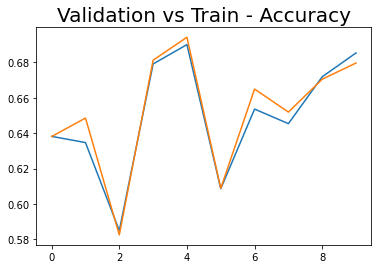

Train Best f1    0.652059
dtype: float64
val Best f1    0.649201
dtype: float64
test Best f1  0.7353394105608566


In [ ]:

ann_train_result = pd.DataFrame()
ann_valid_result = pd.DataFrame()


ann_model1 = MLPClassifier(random_state=42, verbose=False, hidden_layer_sizes=(32,),activation='relu', max_iter=500)


for train_idx, val_idx in k_folds.split(X_train_S):
    x_trainSet = X_train_S[train_idx]
    y_trainSet = y_train.iloc[train_idx]
    x_valSet = X_train_S[val_idx]
    y_valSet = y_train.iloc[val_idx]
    ann_model1.fit(x_trainSet, y_trainSet)
    f1_train = f1_score(y_trainSet, ann_model1.predict(standard.transform(x_trainSet)), average='macro')
    f1_val = f1_score(y_valSet, ann_model1.predict(standard.transform(x_valSet)), average='macro')
    ann_train_result = ann_train_result.append({'Train Best f1': f1_train}, ignore_index=True)
    ann_valid_result = ann_valid_result.append({'val Best f1': f1_val}, ignore_index=True)



ann_train_best = ann_train_result.mean()
ann_valid_best = ann_valid_result.mean()
f1_test = f1_score(y_test, ann_model1.predict(standard.transform(X_test)), average='macro')

print(ann_train_best)
print(ann_valid_best)
print('test Best f1 ', f1_test)

the chosen model:

In [62]:


ann_model1 = MLPClassifier(random_state=42, hidden_layer_sizes=(32,),activation='relu',learning_rate_init=0.001, max_iter=500)
ann_model1.fit(X_train_S, y_train)

f1_train = f1_score(y_train, ann_model.predict(X_train_S), average='macro')
f1_val = f1_score(y_test, ann_model.predict(standard.transform(X_test)), average='macro')

print(f1_train)
print(f1_val)

0.7701933056561081
0.733615649032975


0.5110960910217416


C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\2419707344.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop('nullnumbers', 1)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\2419707344.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X3 = df3.drop('smoking', 1)
c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


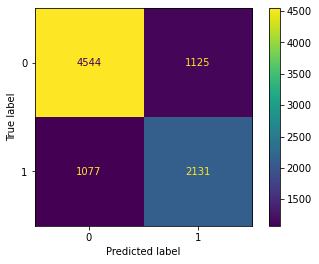

[[4544 1125]
 [1077 2131]]


In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df3 = pd.read_csv('C:/Users/szaroog/OneDrive - Intel Corporation/Desktop/afterAdata.csv', header=0)
df3 = df3.drop(df3.columns[0], axis=1) # remove ID column
df3 = df3.drop('nullnumbers', 1)
X3 = df3.drop('smoking', 1)
y3 = df3['smoking']


le_gender = LabelEncoder()
le_age = LabelEncoder()
le_tartar = LabelEncoder()
le_BMI = LabelEncoder()
le_BloodPressure = LabelEncoder()

X3['gender_n']= le_gender.fit_transform(X3['gender'])
X3['age_n']= le_gender.fit_transform(X3['age'])
X3['tartar_n']= le_gender.fit_transform(X3['tartar'])
X3['BMI_n']= le_gender.fit_transform(X3['BMI'])
X3['BloodPressure_n']= le_gender.fit_transform(X3['BloodPressure'])
X3 = X3.drop(['gender','age','tartar','BMI','BloodPressure'],axis ='columns')


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

from sklearn.metrics import confusion_matrix
predictions = ann_model1.predict(standard.transform(X3_test))


cm = confusion_matrix(y3_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)


In [91]:
data_test = pd.read_csv('C:/Users/szaroog/OneDrive - Intel Corporation/Desktop/X_test.csv', header=0)
data_test = data_test.drop(data_test.columns[0], axis=1) 

data_test = data_test.drop('waist(cm)',1)
data_test = data_test.drop('hearing(left)',1)
data_test = data_test.drop('hearing(right)',1)
data_test = data_test.drop('ALT',1)
data_test = data_test.drop('Cholesterol',1)



data_test['BMI'] = (data_test['weight(kg)']/((data_test['height(cm)']/100)**2))

data_test['BMI']= np.where(data_test['BMI']<= (18.5),0 , data_test['BMI'])
data_test['BMI'] = np.where(data_test['BMI'].between(18.5,25), 1, data_test['BMI'])
data_test['BMI'] = np.where(data_test['BMI'].between(25,30), 2, data_test['BMI'])
data_test['BMI'] = np.where(data_test['BMI']>30, 3, data_test['BMI'])

data_test['BMI']=data_test['BMI'].replace(0, 'Underweight')
data_test['BMI']=data_test['BMI'].replace(1, 'Normalweight')
data_test['BMI']=data_test['BMI'].replace(2, 'Overweight')
data_test['BMI']=data_test['BMI'].replace(3, 'Obesity')

data_test = data_test.drop('weight(kg)',1)
data_test = data_test.drop('height(cm)',1)


data_test['eyesight']= np.where( (data_test['eyesight(right)']== 1) & (data_test['eyesight(left)']== 1),1 , 0)
print(data_test['eyesight'])

data_test = data_test.drop('eyesight(right)',1)
data_test = data_test.drop('eyesight(left)',1)

data_test['age']= np.where(data_test['age']<= (14),0 , data_test['age'])
data_test['age'] = np.where(data_test['age'].between(15,18), 1, data_test['age'])
data_test['age'] = np.where(data_test['age'].between(19,25), 2, data_test['age'])
data_test['age'] = np.where(data_test['age'].between(26,40), 3, data_test['age'])
data_test['age'] = np.where(data_test['age'].between(41,65), 4, data_test['age'])
data_test['age'] = np.where(data_test['age']>65, 5, data_test['age'])


data_test['age']=data_test['age'].replace(0, 'Kids')
data_test['age']=data_test['age'].replace(1, 'Teen')
data_test['age']=data_test['age'].replace(2, 'Young')
data_test['age']=data_test['age'].replace(3, 'YoungAdult')
data_test['age']=data_test['age'].replace(4, 'adult')
data_test['age']=data_test['age'].replace(5, 'retirement')

data_test['BloodPressure']= np.where((data_test['systolic']== 0) & (data_test['relaxation']== 0),1 ,"")
data_test['BloodPressure']= np.where( (data_test['systolic']== 1) & (data_test['relaxation']== 1),2 , data_test['BloodPressure'])
data_test['BloodPressure']= np.where( (data_test['systolic']== 2) & (data_test['relaxation']== 2),3 , data_test['BloodPressure'])
data_test['BloodPressure']= np.where( (data_test['systolic']== 2) & (data_test['relaxation']== 0),4 ,data_test['BloodPressure'])
data_test['BloodPressure']= np.where( (data_test['systolic']== 0) & (data_test['relaxation']== 2),4 , data_test['BloodPressure'])




data_test['BloodPressure']=data_test['BloodPressure'].replace(1, 'Low')
data_test['BloodPressure']=data_test['BloodPressure'].replace(2, 'Normal')
data_test['BloodPressure']=data_test['BloodPressure'].replace(3, 'High')
data_test['BloodPressure']=data_test['BloodPressure'].replace(4, 'Diff')

print(data_test['BloodPressure'])



0         
1         
2         
3         
4         
        ..
11097     
11098     
11099     
11100     
11101     
Name: BloodPressure, Length: 11102, dtype: object


In [93]:
le_gender1 = LabelEncoder()
le_age1 = LabelEncoder()
le_tartar1 = LabelEncoder()
le_BMI1 = LabelEncoder()
le_BloodPressure1 = LabelEncoder()

data_test['gender_n']= le_gender1.fit_transform(data_test['gender'])
data_test['age_n']= le_gender1.fit_transform(data_test['age'])
data_test['tartar_n']= le_gender1.fit_transform(data_test['tartar'])
data_test['BMI_n']= le_gender1.fit_transform(data_test['BMI'])
data_test['BloodPressure_n']= le_gender1.fit_transform(data_test['BloodPressure'])



In [99]:
# data_test = data_test.drop(['gender','age','tartar','BMI','BloodPressure','oral','relaxation','systolic'],axis ='columns')
data_test = pd.DataFrame(data_test).dropna().values

test_predictions = ann_model1.predict(standard.transform(data_test))
print(test_predictions)

CSV = pd.DataFrame({
    "Prediction": test_predictions
})
CSV.to_csv("prediction.csv", index=False)




[0 0 0 ... 0 0 1]


c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


K means!

In [4]:
df2 = pd.read_csv('C:/Users/szaroog/OneDrive - Intel Corporation/Desktop/afterAdata.csv', header=0)
df2 = df2.drop(df2.columns[0], axis=1) # remove ID column
df2 = df2.drop('nullnumbers', 1)
X1 = df2.drop('smoking', 1)
y1 = df2['smoking']
k_folds = KFold(n_splits=10)
X1 = X1.drop(['gender','age','tartar','BMI','BloodPressure'],axis ='columns')

pd.value_counts(y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

standard = StandardScaler()
X_train_S1 = X1_train.copy()
X_train_S1 = standard.fit_transform(X_train_S1)



C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\393392103.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop('nullnumbers', 1)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\393392103.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = df2.drop('smoking', 1)


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.54487504 0.20898631 0.16816289 0.03954876]
0.9615729953460576


In [51]:
column_names = X1_train.columns
first_component = pca.components_[0, :]
max_index = np.argmax(np.abs(first_component))
max_column = column_names[max_index]
print(f"The original column with the largest contribution to the first principal component is {max_column}.")
sec_component = pca.components_[1, :]
max_index1 = np.argmax(np.abs(sec_component))
max_column1 = column_names[max_index1]
print(f"The original column with the sec largest contribution to the first principal component is {max_column1}.")
sec_component = pca.components_[2, :]
max_index2 = np.argmax(np.abs(sec_component))
max_column2= column_names[max_index2]
print(f"The original column with the sec largest contribution to the first principal component is {max_column2}.")
new_data = pd.DataFrame()
new_data['triglyceride'] = X1_train['triglyceride']
new_data['Gtp'] = X1_train['Gtp']



The original column with the largest contribution to the first principal component is triglyceride.
The original column with the sec largest contribution to the first principal component is Gtp.
The original column with the sec largest contribution to the first principal component is LDL.


In [47]:
print(new_data)

       triglyceride  Gtp
41159           237   70
3613            163   16
28414            46   19
36434            51   11
41065            60   19
...             ...  ...
7763             86   33
15377           162   41
17730           217   47
28030           210  116
15725           107   25

[35507 rows x 2 columns]


In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=42)
kmeans.fit(new_data)
new_data_test = pd.DataFrame()
new_data_test['triglyceride'] = X1_test['triglyceride']
new_data_test['Gtp'] = X1_test['Gtp']


f1_train_kmeans = f1_score(y1_train, kmeans.predict(new_data), average='macro')
f1_test_kmeans = f1_score(y1_test, kmeans.predict(new_data_test), average='macro')
print(f1_train_kmeans)
print(f1_test_kmeans)


0.6061228623265502
0.593369619285578


<AxesSubplot:xlabel='triglyceride', ylabel='Gtp'>

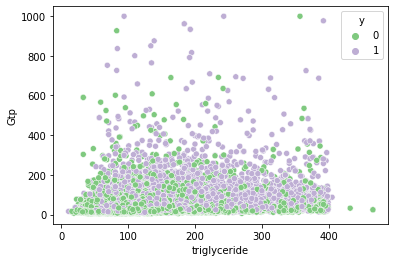

In [49]:
X1_train['y'] = y1_train
sns.scatterplot(x='triglyceride', y='Gtp', hue='y', data=X1_train, palette='Accent')

In [43]:


X1_train['cluster'] = kmeans.predict(X1_train)
sns.scatterplot(x='triglyceride', y='Gtp', hue='cluster', data=X1_train, palette='Accent')


The original column with the largest contribution to the first principal component is triglyceride.
The original column with the sec largest contribution to the first principal component is Gtp.


c:\Users\szaroog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cluster

  warnings.warn(message, FutureWarning)


ValueError: X has 12 features, but KMeans is expecting 11 features as input.

In [51]:
X1_train = X1_train.drop('cluster', 1)
X1_train = X1_train.drop('y', 1)


from sklearn.metrics import silhouette_score, davies_bouldin_score
iner_list = []
dbi_list = []
sil_list = []
for n_clusters in tqdm(range(2, 10, 1)):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X1_train)
    assignment = kmeans.predict(X1_train)
    
    iner = kmeans.inertia_
    sil = silhouette_score(X1_train, assignment)
    dbi = davies_bouldin_score(X1_train, assignment)
    
    dbi_list.append(dbi)
    sil_list.append(sil)
    iner_list.append(iner)

C:\Users\szaroog\AppData\Local\Temp\ipykernel_4076\600276231.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1_train = X1_train.drop('cluster', 1)
C:\Users\szaroog\AppData\Local\Temp\ipykernel_4076\600276231.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1_train = X1_train.drop('y', 1)
100%|██████████| 8/8 [01:35<00:00, 11.89s/it]


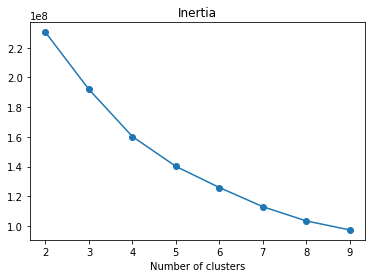

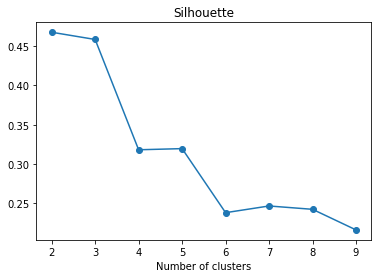

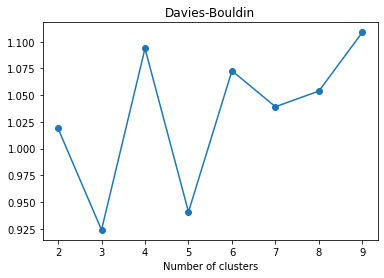

In [52]:
plt.plot(range(2, 10, 1), iner_list, marker='o')
plt.title("Inertia")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), sil_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), dbi_list, marker='o')
plt.title("Davies-Bouldin")
plt.xlabel("Number of clusters")
plt.show()

queation 4 - hirrarcical model 

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(X1_train)
predicted_labels = cluster.labels_
print( cluster.labels_)


[0 1 2 ... 0 1 2]


In [10]:
f1_train_cluster = f1_score(y1_train,predicted_labels, average='macro')
print(f1_train_cluster)
f1_test_cluster = f1_score(y1_test, cluster.fit_predict(X1_test), average='macro')

print(f1_test_cluster)

0.19058057664805594
0.22081890315865682


In [43]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc.fit(X1)
hc.labels_
print(len())



array([2, 0, 1, ..., 1, 0, 1], dtype=int64)

111111111111 0        212
1        285
2        120
3        264
4         94
        ... 
44379     97
44380    209
44381     64
44382    336
44383     62
Name: triglyceride, Length: 44384, dtype: int64
222222222222222 0        34
1        67
2        43
3        89
4        16
         ..
44379    15
44380    18
44381    18
44382    96
44383    16
Name: Gtp, Length: 44384, dtype: int64


C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\1743891178.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Hirarchical clustering')

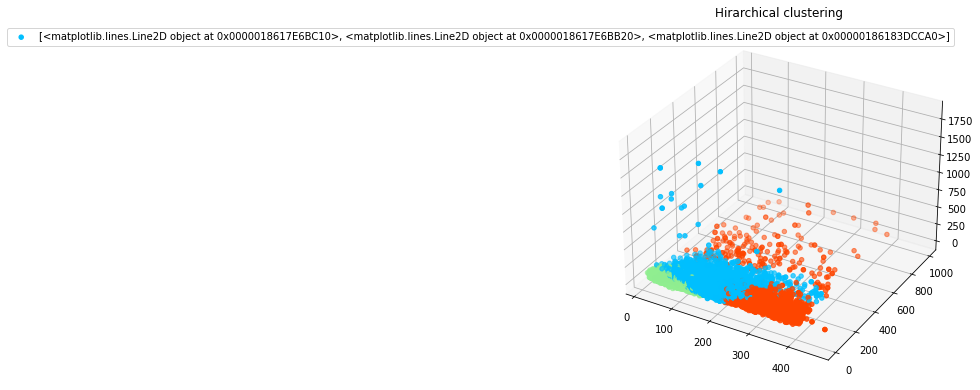

In [53]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
cmap = ListedColormap(["orangered","lightgreen","deepskyblue"])

x= X1['triglyceride']
y=  X1['Gtp']
z= X1['LDL']

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

sc = ax.scatter(x,y,z, c=  hc.labels_,cmap = cmap , marker = "o")
plt.legend(sc.legend_elements())

plt.title("Hirarchical clustering")

C:\Users\szaroog\AppData\Local\Temp\ipykernel_11840\1823127942.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'k-means clustering')

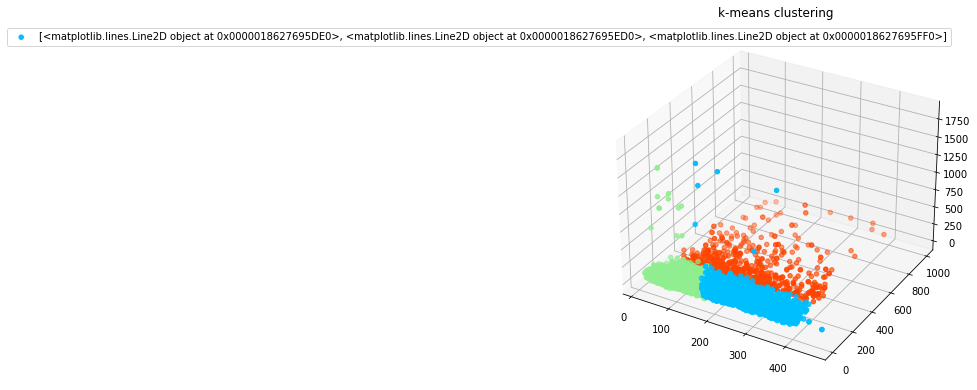

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=42)
kmeans.fit(X1)
cmap = ListedColormap(["orangered","lightgreen","deepskyblue"])

x1= X1['triglyceride']
y1=  X1['Gtp']
z1= X1['LDL']

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

sc = ax.scatter(x1,y1,z1, c= kmeans.predict(X1),cmap = cmap , marker = "o")
plt.legend(sc.legend_elements())

plt.title("k-means clustering")